In [1]:
# Google Colab Link:
# https://colab.research.google.com/drive/1yaJISw8PN7QpvyvmW4VRWPg7g7KNYFOE?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

In [5]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/sentiment.csv')
trader_df = pd.read_csv('/content/drive/MyDrive/trader_data.csv')

In [6]:
# Preview first few rows
print("Sentiment Data:")
display(sentiment_df.head())
print("\nTrader Data:")
display(trader_df.head())

Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
# Missing values
print("Missing values in Sentiment Data:\n", sentiment_df.isnull().sum())
print("\nMissing values in Trader Data:\n", trader_df.isnull().sum())

Missing values in Sentiment Data:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Trader Data:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [8]:
# 3. Basic info
print(" Sentiment Data Info:")
print(sentiment_df.info())
print("\n Trader Data Info:")
print(trader_df.info())

 Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

 Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-nul

In [9]:
# 1. Convert date columns
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format='%Y-%m-%d')
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
# 2. Create a trade_date column in trader_df
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date

In [10]:
# 3. Merge sentiment with trader data
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    left_on='trade_date',
    right_on=sentiment_df['date'].dt.date,
    how='left')

In [11]:
# 4. Drop extra merge helper columns if needed
merged_df.drop(columns=['date'], inplace=True)

In [12]:
merged_df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed


In [13]:
# Clean column names
merged_df.columns = merged_df.columns.str.strip()
merged_df.columns = merged_df.columns.str.replace(' ', '_')

In [14]:
# Basic info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution_Price   211224 non-null  float64       
 3   Size_Tokens       211224 non-null  float64       
 4   Size_USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp_IST     211224 non-null  datetime64[ns]
 7   Start_Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed_PnL        211224 non-null  float64       
 10  Transaction_Hash  211224 non-null  object        
 11  Order_ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [15]:
# Shape
print(f"Rows: {merged_df.shape[0]}, Columns: {merged_df.shape[1]}")

Rows: 211224, Columns: 18


In [16]:
# First few rows
merged_df.head(3)

,Account,Coin,Execution_Price,Size_Tokens,Size_USD,Side,Timestamp_IST,Start_Position,Direction,Closed_PnL,Transaction_Hash,Order_ID,Crossed,Fee,Trade_ID,Timestamp,trade_date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed


In [17]:
# Count missing values
merged_df.isnull().sum()
# Optional: remove rows with missing sentiment classification
merged_df = merged_df.dropna(subset=['classification'])

In [18]:
# Check missing sentiment
missing_count = merged_df['classification'].isnull().sum()
print(f" Missing sentiment values: {missing_count}")

 Missing sentiment values: 0


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

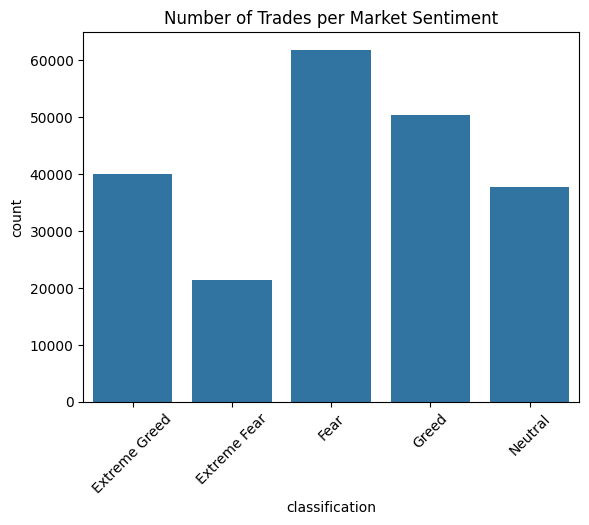

In [20]:
# Sentiment distribution
sns.countplot(x='classification', data=merged_df)
plt.title('Number of Trades per Market Sentiment')
plt.xticks(rotation=45)
plt.show()

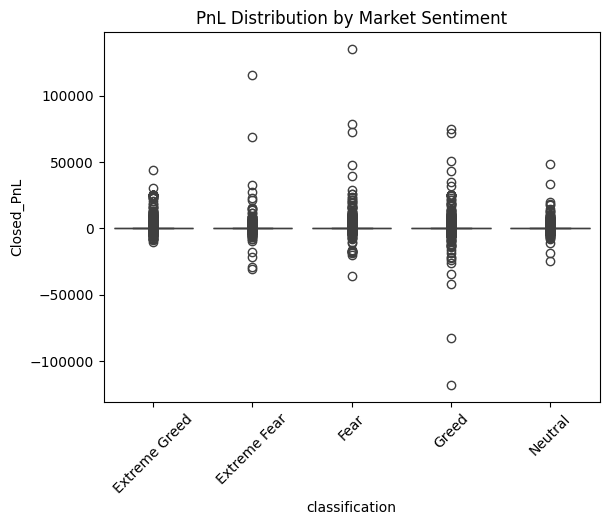

In [21]:
# PnL vs Sentiment
sns.boxplot(x='classification', y='Closed_PnL', data=merged_df)
plt.title('PnL Distribution by Market Sentiment')
plt.xticks(rotation=45)
plt.show()

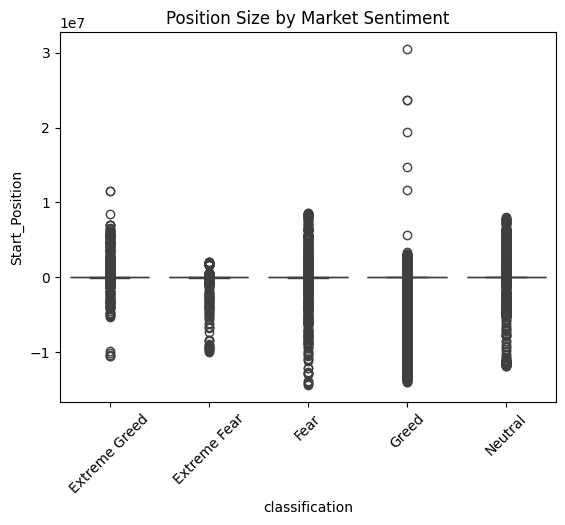

In [22]:
# Leverage / Position Size by Sentiment
sns.boxplot(x='classification', y='Start_Position', data=merged_df)
plt.title('Position Size by Market Sentiment')
plt.xticks(rotation=45)
plt.show()

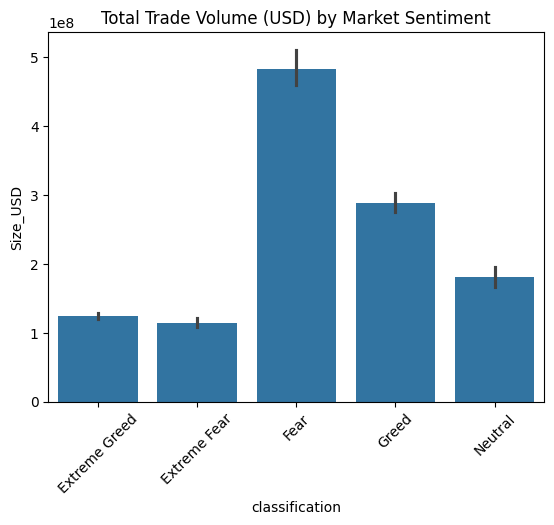

In [23]:
#  Trade Volume by Sentiment
sns.barplot(
    x='classification',
    y='Size_USD',
    data=merged_df,
    estimator=sum)
plt.title('Total Trade Volume (USD) by Market Sentiment')
plt.xticks(rotation=45)
plt.show()

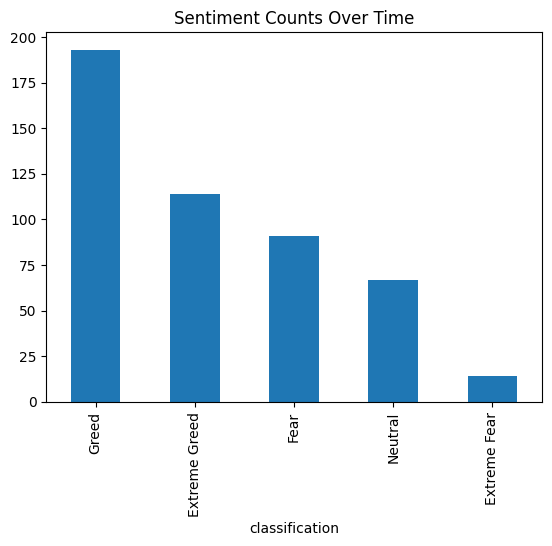

In [24]:
# Sentiment trend over time
sentiment_trend = merged_df.groupby('trade_date')['classification'].first()
sentiment_trend.value_counts().plot(kind='bar')
plt.title('Sentiment Counts Over Time')
plt.show()

In [25]:
#  Sentiment distribution
sentiment_counts = merged_df['classification'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)
print("\nMost common market mood:", sentiment_counts.idxmax())

Sentiment Distribution:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

Most common market mood: Fear


In [26]:
#  Average & median PnL by sentiment
pnl_stats = merged_df.groupby('classification')['Closed_PnL'].agg(['mean', 'median'])
print("\n PnL Stats by Sentiment:")
print(pnl_stats)


 PnL Stats by Sentiment:
                     mean  median
classification                   
Extreme Fear    34.537862     0.0
Extreme Greed   67.892861     0.0
Fear            54.290400     0.0
Greed           42.743559     0.0
Neutral         34.307718     0.0


In [27]:
#  Average position size (risk level) by sentiment
position_stats = merged_df.groupby('classification')['Start_Position'].mean()
print("\n Average Position Size by Sentiment:")
print(position_stats)


 Average Position Size by Sentiment:
classification
Extreme Fear      -2322.304587
Extreme Greed     19518.990812
Fear               8709.824822
Greed           -151088.546635
Neutral             144.002263
Name: Start_Position, dtype: float64


In [28]:
#  Total trading volume by sentiment
volume_stats = merged_df.groupby('classification')['Size_USD'].sum()
print("\nTotal Trading Volume by Sentiment:")
print(volume_stats)


Total Trading Volume by Sentiment:
classification
Extreme Fear     1.144843e+08
Extreme Greed    1.244652e+08
Fear             4.833248e+08
Greed            2.885825e+08
Neutral          1.802421e+08
Name: Size_USD, dtype: float64


In [29]:
summary_points = [
    f"Total trades analyzed: {len(merged_df)}",
    f"Most common market sentiment: {merged_df['classification'].value_counts().idxmax()}",
    f"Highest average PnL in: {merged_df.groupby('classification')['Closed_PnL'].mean().idxmax()}",
    f"Largest average position size in: {merged_df.groupby('classification')['Start_Position'].mean().idxmax()}",
    f"Highest total trade volume in: {merged_df.groupby('classification')['Size_USD'].sum().idxmax()}"
]

In [30]:
#  Quick Observations (prints simple interpretation)
print("\n📊 Quick Observations:")
print(f"- Greed occurs {round((sentiment_counts['Greed'] / sentiment_counts.sum())*100, 2)}% of the time.")
print(f"- Fear occurs {round((sentiment_counts['Fear'] / sentiment_counts.sum())*100, 2)}% of the time.")
print(f"- Average PnL is higher on {pnl_stats['mean'].idxmax()} days.")
print(f"- Traders take bigger positions on {position_stats.idxmax()} days.")
print(f"- Total trading volume is highest during {volume_stats.idxmax()} days.")


📊 Quick Observations:
- Greed occurs 23.82% of the time.
- Fear occurs 29.28% of the time.
- Average PnL is higher on Extreme Greed days.
- Traders take bigger positions on Extreme Greed days.
- Total trading volume is highest during Fear days.


In [31]:
# Time-based sentiment trend
trend_over_time = merged_df.groupby('trade_date')['classification'].first().value_counts()
print("\nSentiment Occurrences Over Time:")
print(trend_over_time)


Sentiment Occurrences Over Time:
classification
Greed            193
Extreme Greed    114
Fear              91
Neutral           67
Extreme Fear      14
Name: count, dtype: int64


In [32]:
print("\n Final Key Insights:")
for point in summary_points:
    print("-", point)


 Final Key Insights:
- Total trades analyzed: 211218
- Most common market sentiment: Fear
- Highest average PnL in: Extreme Greed
- Largest average position size in: Extreme Greed
- Highest total trade volume in: Fear
